## Random Forest -- Example

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd

In [11]:
dataframe = pd.read_csv("credit.csv")

In [3]:
dataframe.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


In [4]:
dataframe.shape

(1000, 32)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

In [6]:
dataframe['RESPONSE'].unique()

array([1, 0], dtype=int64)

In [7]:
# All values are Non null values
# And all values are in integer or float format
# So we can proceed with the Random Forest Classifier model

# Splitting the data into dependent and independent variables
X = dataframe.drop('RESPONSE', axis=1)
y  = dataframe['RESPONSE']

# Splitting the dataset into training	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# Creating the Random Forest Classifier model
model = RandomForestClassifier()

# Training the model
model.fit(X_train, y_train)
# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.67%


In [38]:
# Finding the confusion matrix for a classification model
conf_matrix = confusion_matrix(y_test, predictions)


In [39]:
# F-1 Score
# =============================================================================
"""Calculates the F-score, which is the weighted average of the precision and recall scores. 
The F-score assesses both the accuracy of the model and the completeness of the model. 
The F-score is calculated as follows:"""

f1_sc = f1_score(y_test, predictions, average='weighted')
roc_auc_scr = roc_auc_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
acc = accuracy_score(y_test, predictions)
tn, fp, fn, tp = conf_matrix.ravel()	


 Model Name --> RandomForestClassifier 

 * F1 score (weighted) --> 0.7338677806511504
 * ROC AUC SCORE --> 0.6516378358483621
 * Precison --> 0.7435215053763441
 * Recall --> 0.7566666666666667
 * Accuracy --> 0.7566666666666667
 * Confusion Matrix --> 
 [[ 35  56]
 [ 17 192]]
   - FALSE POSITIVES --> 56
   -False Negatives --> 17
   -True POSITIVES --> 192
   -True Negatives --> 35


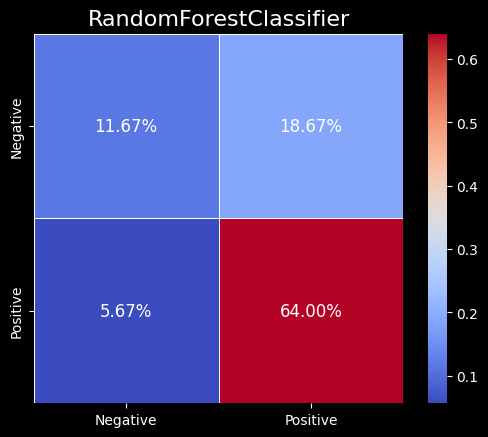

In [40]:
print('\n Model Name -->',model.__class__.__name__,'\n')
print('=============================================')
print(' * F1 score (weighted) -->',f1_sc)
print(' * ROC AUC SCORE -->',roc_auc_scr)
print(' * Precison -->',precision)
print(' * Recall -->',recall)
print(' * Accuracy -->',acc)
print(' * Confusion Matrix --> \n',conf_matrix)
print('   - FALSE POSITIVES -->',fp)
print('   -False Negatives -->',fn)
print('   -True POSITIVES -->',tp)
print('   -True Negatives -->',tn)
print('=============================================')
# Create the heatmap with annotation and title
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='coolwarm', fmt='.2%', linewidths=.5, cbar=True, annot_kws={'fontsize':12}, 
	xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], square=True)

# Add title to the heatmap
plt.title(model.__class__.__name__, fontsize=16)
plt.show()

In [33]:
# =============================================================================
# Random Forest Classifier with some tuning

# Creating the Random Forest Classifier model
model_tunned = RandomForestClassifier(n_estimators=2000,criterion='log_loss', max_depth=50,min_samples_leaf = 3,ccp_alpha=0.01, random_state=42)
# Fitting the model to the training data
model_tunned.fit(X_train, y_train)
# Making predictions on the test set
predictions_tuned = model_tunned.predict(X_test)
# Calculating the accuracy of the model
accuracy_tuned = accuracy_score(y_test, predictions_tuned)
print("Accuracy: %.2f%%" % (accuracy_tuned * 100.0))

Accuracy: 72.67%


In [34]:
# Finding the confusion matrix for a classification model
conf_matrix_tunned = confusion_matrix(y_test, predictions_tuned)

In [35]:
# =============================================================================
"""Calculates the F-score, which is the weighted average of the precision and recall scores. 
The F-score assesses both the accuracy of the model and the completeness of the model. 
The F-score is calculated as follows:"""

f1_sc_tunned = f1_score(y_test, predictions_tuned, average='weighted')
roc_auc_scr_tunned = roc_auc_score(y_test, predictions_tuned)
precision_tunned = precision_score(y_test, predictions_tuned, average='weighted')
recall_tunned = recall_score(y_test, predictions_tuned, average='weighted')
acc_tunned = accuracy_score(y_test, predictions_tuned)
tn_tunned, fp_tunned, fn_tunned, tp_tunned = conf_matrix_tunned.ravel()	


 Model Name --> RandomForestClassifier 

 * F1 score (weighted) --> 0.660853825136612
 * ROC AUC SCORE --> 0.5680635154319364
 * Precison --> 0.7235603345280764
 * Recall --> 0.7266666666666667
 * Accuracy --> 0.7266666666666667
 * Confusion Matrix --> 
 [[ 15  76]
 [  6 203]]
   - FALSE POSITIVES --> 76
   -False Negatives --> 6
   -True POSITIVES --> 203
   -True Negatives --> 15


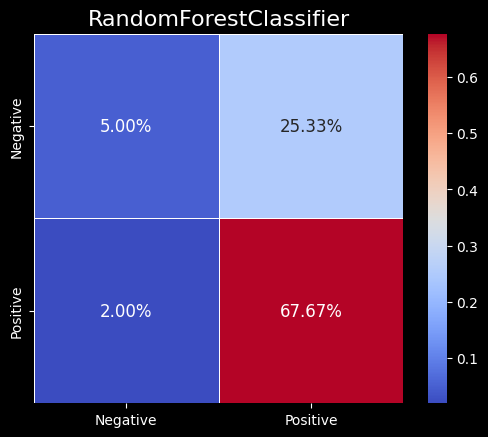

In [36]:
print('\n Model Name -->',model.__class__.__name__,'\n')
print('=============================================')
print(' * F1 score (weighted) -->',f1_sc_tunned)
print(' * ROC AUC SCORE -->',roc_auc_scr_tunned)
print(' * Precison -->',precision_tunned)
print(' * Recall -->',recall_tunned)
print(' * Accuracy -->',acc_tunned)
print(' * Confusion Matrix --> \n',conf_matrix_tunned)
print('   - FALSE POSITIVES -->',fp_tunned)
print('   -False Negatives -->',fn_tunned)
print('   -True POSITIVES -->',tp_tunned)
print('   -True Negatives -->',tn_tunned)
print('=============================================')
# Create the heatmap with annotation and title
sns.heatmap(conf_matrix_tunned/np.sum(conf_matrix_tunned), annot=True, cmap='coolwarm', fmt='.2%', linewidths=.5, cbar=True, annot_kws={'fontsize':12}, 
	xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], square=True)

# Add title to the heatmap
plt.title(model.__class__.__name__, fontsize=16)
plt.show()

In [31]:
cols = dataframe.columns[dataframe.columns != 'RESPONSE']

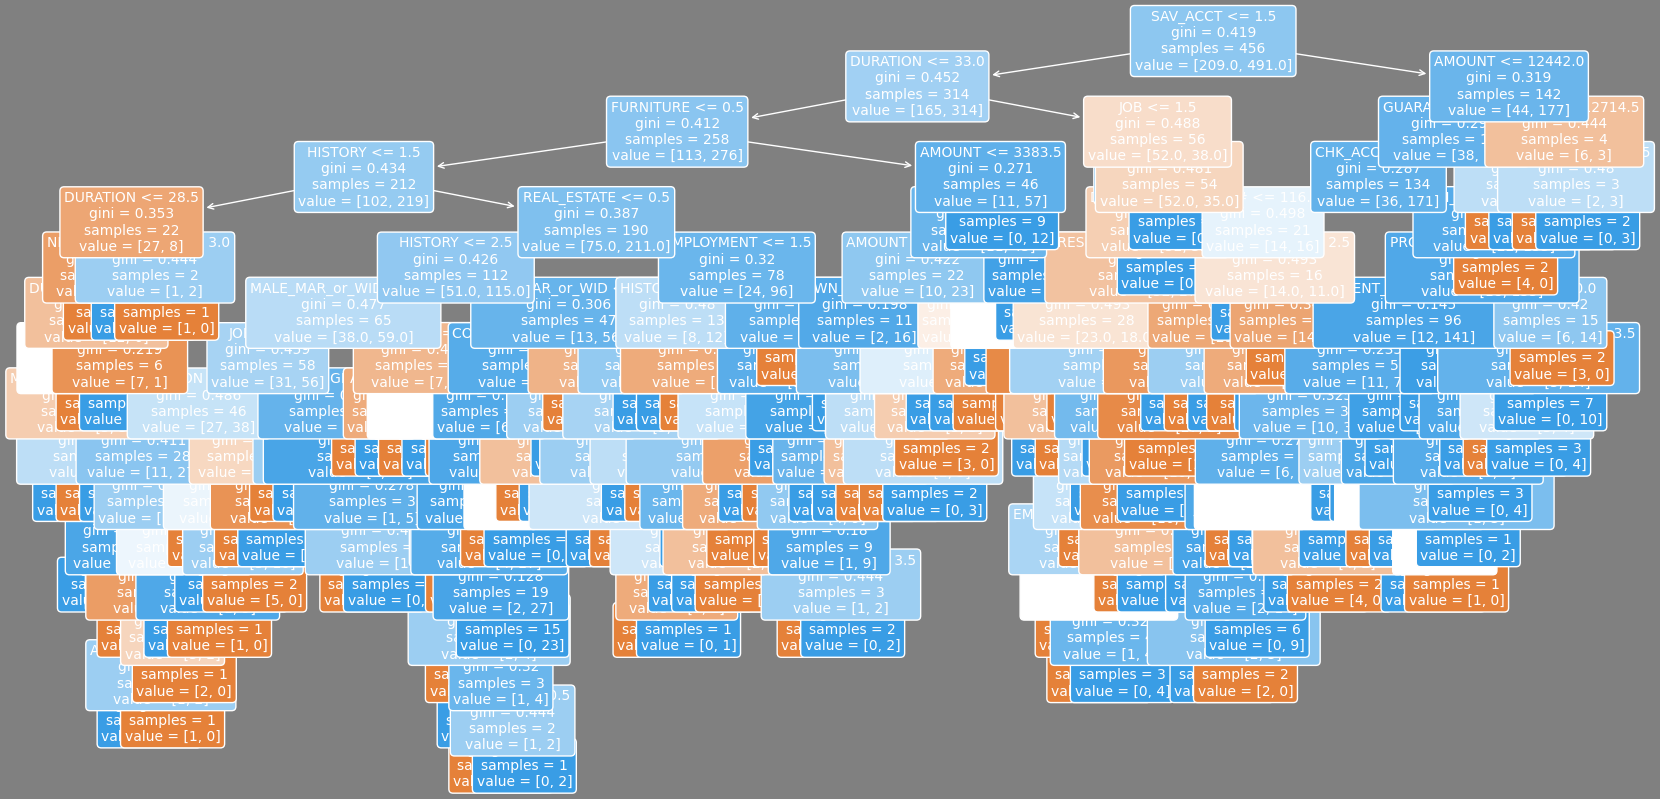

In [43]:
from sklearn import tree

# Get one of the decision trees from the forest (e.g., the first tree)
one_tree = model.estimators_[0]

plt.figure(figsize=(20, 10), facecolor='gray')  # Adjust the size and background color
tree.plot_tree(one_tree, feature_names=cols, filled=True, rounded=True, fontsize=10)
plt.savefig('random_forest_tree.png', bbox_inches='tight')  # Save the plot as PNG file with tight bounding box
plt.show()


# =============================================================================
# It looks so messy because it is a deep tree. We havn't give any depth to the tree so it go to it's max depth by default
# =============================================================================

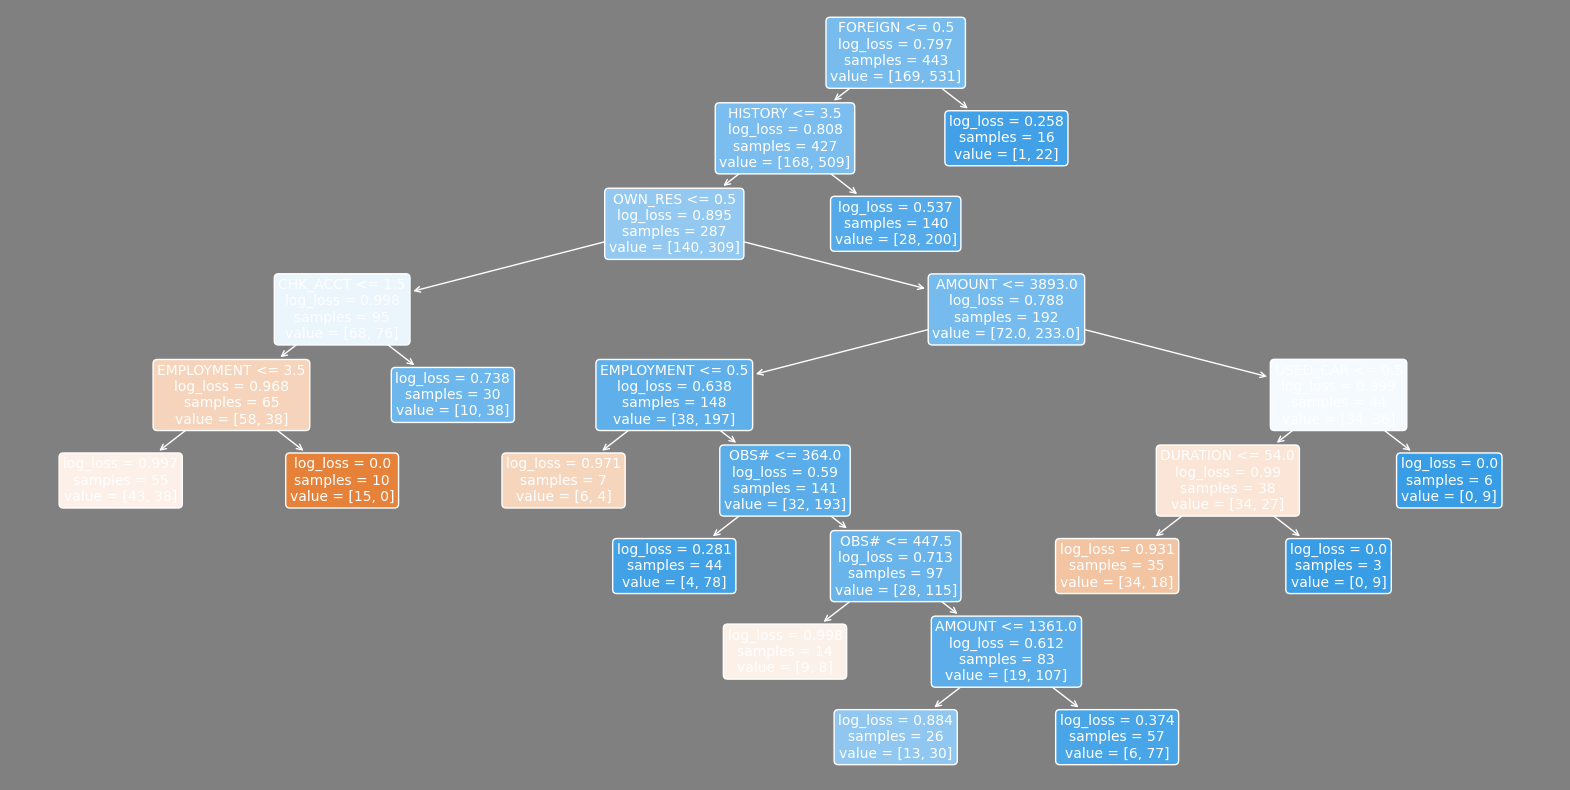

In [44]:
# Get one of the decision trees from the forest (e.g., the first tree)
one_tree = model_tunned.estimators_[0]

plt.figure(figsize=(20, 10), facecolor='gray')  # Adjust the size and background color
tree.plot_tree(one_tree, feature_names=cols, filled=True, rounded=True, fontsize=10)
plt.savefig('random_forest_tree_tunned.png', bbox_inches='tight')  # Save the plot as PNG file with tight bounding box
plt.show()
